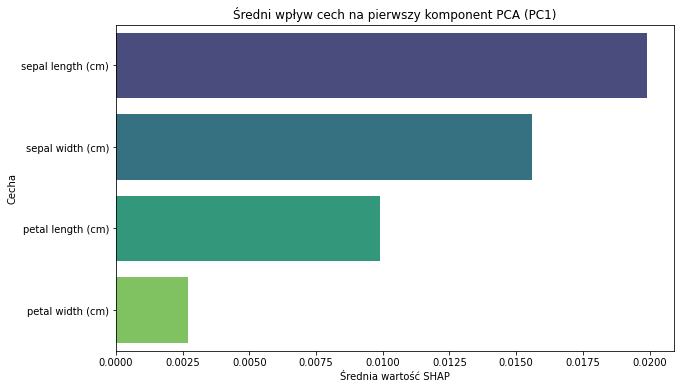

In [2]:
import shap
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

# Załaduj dane
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)

# Model PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# SHAP dla transformacji PCA
explainer = shap.Explainer(pca.transform, X)
shap_values = explainer(X)

# Przygotowanie danych do wykresu SHAP dla pierwszego komponentu
shap_df = pd.DataFrame({
    "feature": X.columns,
    "shap_value": shap_values.values[:, :, 1].mean(axis=0)  # Średnia wartość SHAP dla komponentu PC1
})

# Sortuj cechy według ich wpływu (od największego do najmniejszego)
shap_df = shap_df.sort_values(by="shap_value", ascending=False)

# Wykres paskowy SHAP za pomocą Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x="shap_value", y="feature", data=shap_df, palette="viridis")
plt.title("Średni wpływ cech na pierwszy komponent PCA (PC1)")
plt.xlabel("Średnia wartość SHAP")
plt.ylabel("Cecha")
plt.show()